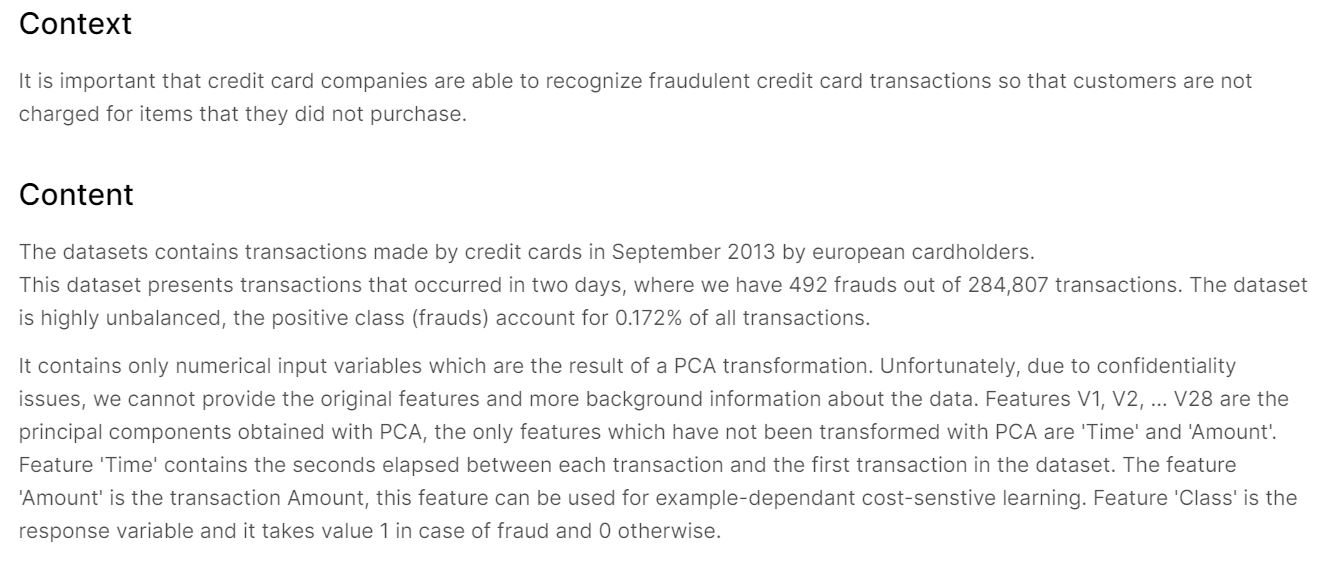 

### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Dataset 

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Basic EDA

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [9]:
fraud.shape, normal.shape

((492, 31), (284315, 31))

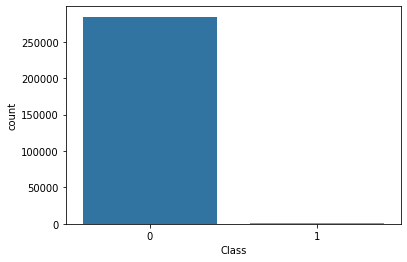

In [10]:
sns.countplot(df.Class)

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### Data Visualization 

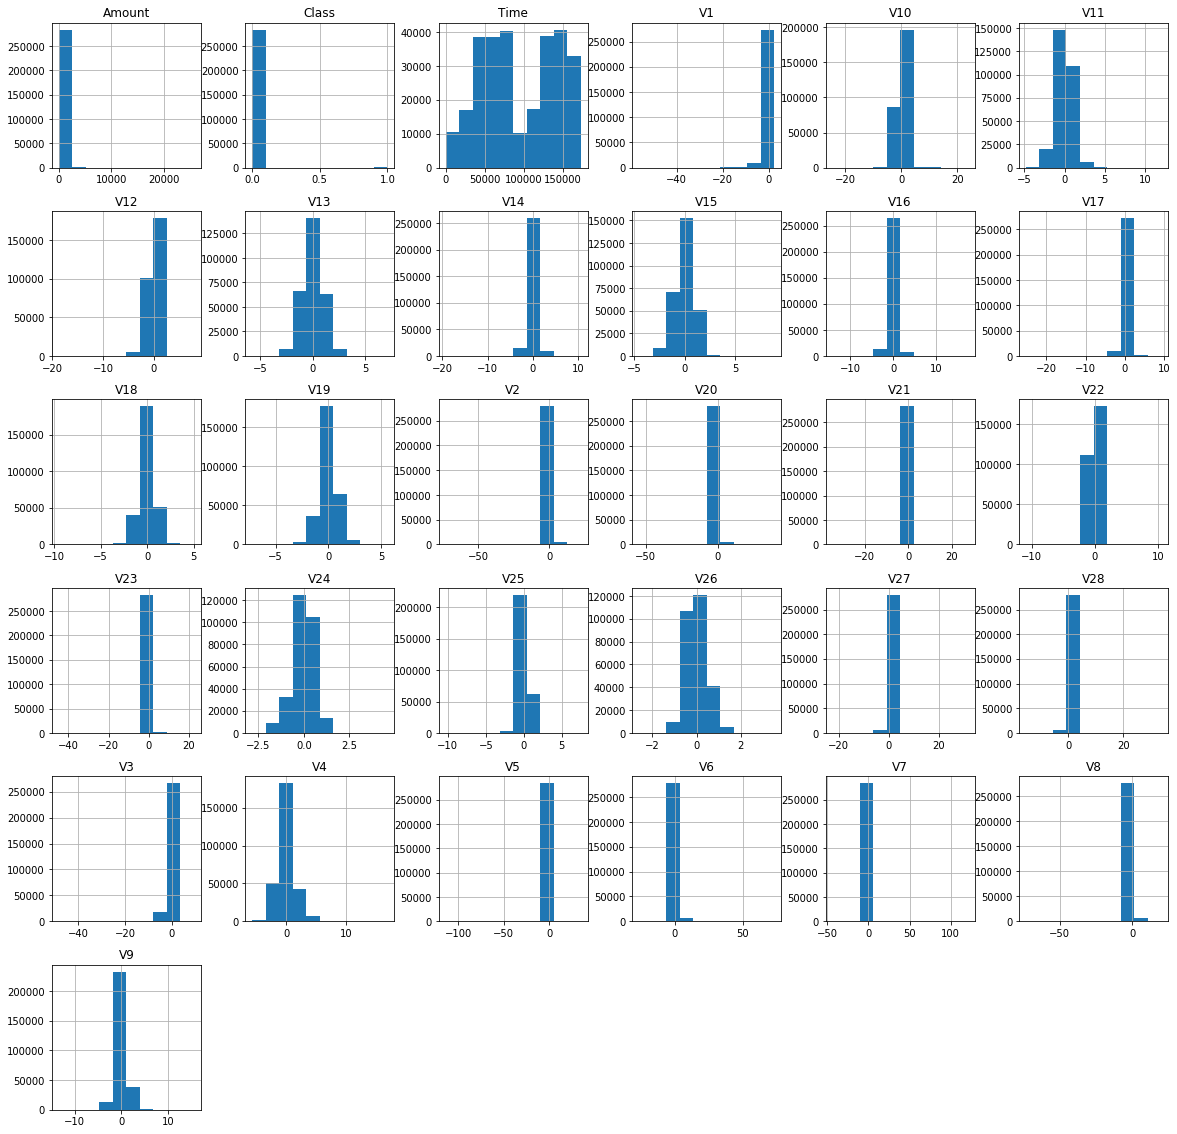

In [13]:
df.hist(figsize=(20,20));

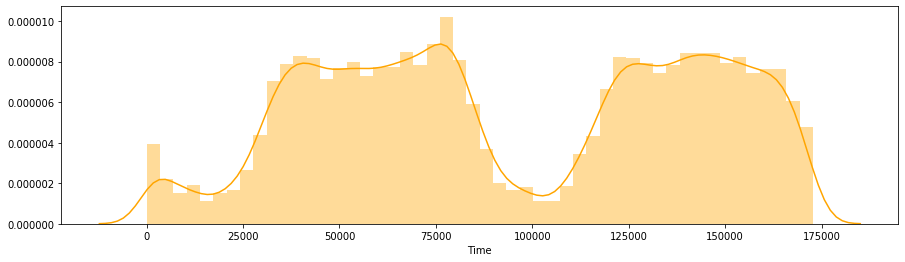

In [14]:
# Distribution of the Time Variable

plt.figure(figsize=(15,4))
fig = sns.distplot(df['Time'], kde=True, color="orange")
plt.show()

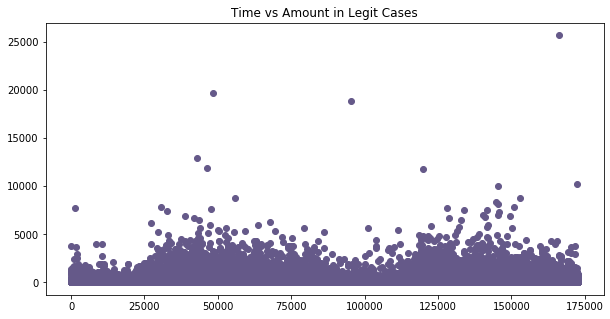

In [15]:
# Time vs Amount in Legit Cases

plt.figure(figsize=(10,5))
fig = plt.scatter(x=normal['Time'], y=normal['Amount'], color="#655989")
plt.title("Time vs Amount in Legit Cases")
plt.show()

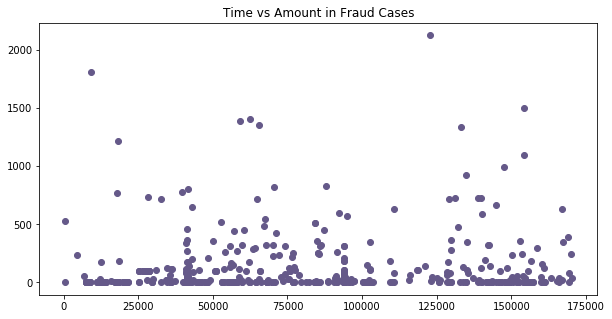

In [16]:
# Time vs Amount in Fraud Cases

plt.figure(figsize=(10,5))
fig = plt.scatter(x=fraud['Time'], y=fraud['Amount'], color="#655989")
plt.title("Time vs Amount in Fraud Cases")
plt.show()

### Balancing and Splitting Data

In [17]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [20]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({0: 227445, 1: 400})


In [22]:
from imblearn.over_sampling import RandomOverSampler 
os = RandomOverSampler() 
X_res,y_res=os.fit_sample(X_train,y_train)

In [23]:
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 227445, 1: 227445})


### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_res,y_res)

RandomForestClassifier(random_state=0)

In [25]:
y_pred = clf.predict(X_test)

In [26]:
from sklearn import metrics 
print("Random Forest accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Random Forest accuracy(in %): 99.95435553526913


In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.91      0.79      0.85        92

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [29]:
print(confusion_matrix(y_test,y_pred))

[[56863     7]
 [   19    73]]
